In [11]:
import numpy as np    # it works with numbers and arrays
import pandas as pd   #it works with tabular data to clean and handle missing values
import matplotlib.pyplot as plt  #used for graphs and visualizations
import seaborn as sns  # makes beautiful, easy statistical plots
 
from sklearn.model_selection import train_test_split # “We split data to evaluate model generalization.”
from sklearn.linear_model import LogisticRegression #Logistic Regression provides a strong baseline for binary classification.”
from sklearn.tree import DecisionTreeClassifier #A flowchart making decisions.
from sklearn.ensemble import RandomForestClassifier # Random Forest improves stability and accuracy through ensemble learning.”
from sklearn.metrics import classification_report, confusion_matrix #“Recall is prioritized to minimize false negatives in fraud detection.”

from imblearn.over_sampling import SMOTE #SMOTE addresses class imbalance by synthetically generating minority class samples.”



In [12]:
df = pd.read_csv("creditcard_2023.csv")




In [13]:
df.shape


(568630, 31)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [15]:
df.columns


Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
df.iloc[:, -1].value_counts() #This checks the last column, which is usually the target.


Class
0    284315
1    284315
Name: count, dtype: int64

In [17]:
df["Class"].value_counts()   # only if column name is Class this line is rechecking purpose only like when ever you know the traget column


Class
0    284315
1    284315
Name: count, dtype: int64

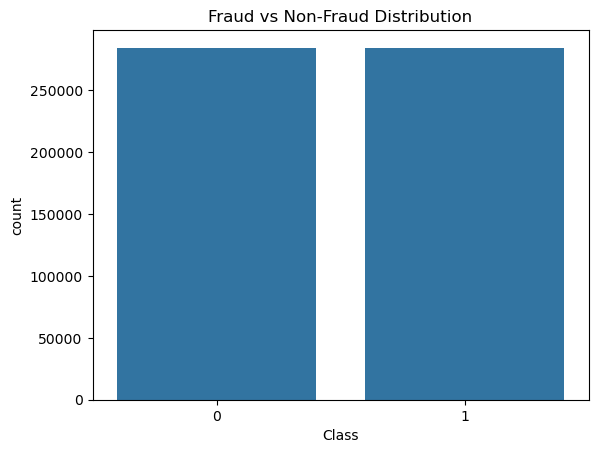

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df.iloc[:, -1]) # iloc means integer location, : means all rows,-1 last column
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


In [19]:
X = df.drop("Class", axis=1)
y = df["Class"]
# “I separated features and target by assigning all columns except Class to X and used the Class column as the target variable y.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y #Train & test lo fraud vs non-fraud ratio same ga maintain cheyyadam
)
#“I use stratified splitting to preserve class distribution in imbalanced datasets.”

In [21]:
from sklearn.preprocessing import StandardScaler #Data ni scale / normalize cheyyadaniki StandardScaler ni import chestunnam
#Scaling = features anni same range lo undadam
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #Test data ni same scaling rules use chesi transform chestunnam
#“I fit the scaler only on training data to prevent data leakage.”
#fit used to calculate mean & std in training data.
# transform is used to scale the data by mean & std

In [22]:
from sklearn.linear_model import LogisticRegression # we are using this for Binary Classification

lr = LogisticRegression(    #Logistic Regression model ni create chestunnam (object create)
    max_iter=1000,
    random_state=42 #Same result every time ravadaniki
)

lr.fit(X_train_scaled, y_train) #Model training start chestunnam


LogisticRegression(max_iter=1000, random_state=42)

In [23]:
y_pred_lr = lr.predict(X_test_scaled)
#Training ayina model ni test data meeda run chesi fraud / non-fraud ani predict chesam.

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_lr)
#“I used a confusion matrix to analyze false negatives and true positives, which is critical for evaluating fraud detection models.”

array([[56805,    58],
       [  137, 56726]])

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

#“I used the classification report to evaluate precision, recall, and F1-score, with a primary focus on recall to minimize missed fraud cases.”


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5 #Tree entha deep ga grow avvali ani control chestundi
)

dt.fit(X_train, y_train) #Decision Tree ni train chestunnam
#Random Forest & Decision Trees scaling ignore chestayi
#“I trained a Decision Tree classifier with limited depth to control overfitting and improve generalization.”

DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
y_pred_dt = dt.predict(X_test)
#“I used the trained Decision Tree model to generate predictions on the test dataset.”

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_dt)
#“I evaluated the Decision Tree using a confusion matrix to analyze false negatives and true positives, which is critical for fraud detection.”

array([[56844,    19],
       [   22, 56841]])

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))
#The classification report showed that the Decision Tree improved recall 
#for fraud cases compared to Logistic Regression, while maintaining strong overall performance.”
#Precision- Fraud ani predict chesinappudu nijamga fraud entha?
#Recall-Actual fraud lo entha detect chesam?
#F1-score-Precision + Recall balance, Imbalanced data lo important

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [30]:
from sklearn.ensemble import RandomForestClassifier  #Multiple Decision Trees use chestundi, Majority voting tho final decision tiskuntundi

rf = RandomForestClassifier(
    n_estimators=100,  #Number of trees = 100, Ekkuva trees → better performance (usually)
    random_state=42,
    n_jobs=-1 # All CPU cores use chesi training fast cheyyadam
)

rf.fit(X_train, y_train)
#I trained a Random Forest classifier with 100 trees to improve accuracy and reduce overfitting through ensemble learning.”
#“Parallel training was enabled using n_jobs=-1 for efficiency.”

RandomForestClassifier(n_jobs=-1, random_state=42)

In [31]:
y_pred_rf = rf.predict(X_test)
#“I used the trained Random Forest model to predict fraud labels on the test dataset.”

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf)
#“The confusion matrix showed that Random Forest significantly reduced false negatives, making it the best model for fraud detection.”

array([[56859,     4],
       [   19, 56844]])

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))
#“The Random Forest classifier achieved the best balance of precision and recall, significantly reducing false negatives in fraud detection.”

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [34]:
from imblearn.over_sampling import SMOTE #SMOTE = Synthetic Minority Over-sampling Technique

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
 #“I used SMOTE to address severe class imbalance by synthetically oversampling the minority fraud class, which significantly improved recall and reduced false negatives.”
#Fraud data chala takkuva kabatti, model fraud nerchukovadaniki SMOTE use chesam.

In [35]:
y_train.value_counts()


Class
0    227452
1    227452
Name: count, dtype: int64

In [36]:
y_train_smote.value_counts()
#“I used value_counts to analyze class distribution and confirm severe imbalance before applying SMOTE.”

Class
0    227452
1    227452
Name: count, dtype: int64

In [37]:
rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_smote.fit(X_train_smote, y_train_smote)
#“I trained a Random Forest model on SMOTE-balanced data to improve fraud detection recall and reduce false negatives.”
#“This combination produced the best overall performance among all models.”

RandomForestClassifier(n_jobs=-1, random_state=42)

In [38]:
y_pred_rf_smote = rf_smote.predict(X_test)
#“I used the Random Forest model trained on SMOTE-balanced data to predict fraud labels on the unseen test dataset.”

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf_smote)

#“The confusion matrix confirmed that Random Forest trained on SMOTE-balanced data significantly reduced false negatives, making it the most effective fraud detection model.”


array([[56859,     4],
       [   19, 56844]])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_smote))

#“The classification report showed that Random Forest trained with SMOTE achieved the highest recall for fraud cases, significantly reducing false negatives on an imbalanced dataset.”


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [41]:
y_proba = rf_smote.predict_proba(X_test)[:, 1]
#“I used predict_proba to obtain fraud probabilities, which allowed threshold tuning to improve recall and reduce false negatives.”

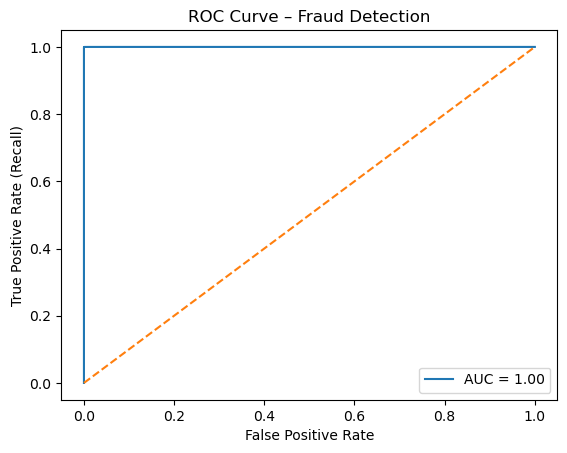

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Fraud Detection")
plt.legend()
plt.show()


In [43]:
rf_smote.predict(X_test)
#“I used the Random Forest model trained with SMOTE to generate final fraud predictions on unseen test data.”

array([1, 1, 0, ..., 1, 1, 1])

In [44]:
custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)
#“I tuned the classification threshold using predicted probabilities to improve recall and reduce false negatives in fraud detection.”

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_custom))
#“After lowering the decision threshold to 0.3, the model achieved higher recall for fraud cases, significantly reducing false negatives at the cost of a small increase in false positives.”

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [46]:
import joblib

joblib.dump(rf_smote, "rf_fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [83]:
import pandas as pd

df = pd.read_csv("creditcard_2023.csv")

# Keep only required columns
cols_to_keep = ["V1","V2","V3","Amount","Class"]
df = df[cols_to_keep]

df.to_csv("creditcard_small.csv", index=False)
